In [121]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.cm as cm
import sympy as sp

In [69]:
#System definition
def xdot(y, t):
    x1, x2 = y
    return [2*x2, -2*x1 + 0.5 * (1 - x1**2)*x2]

#Linear System definition
def linxdot(y, t):
    x1, x2 = y
    return [2*x2, -2*x1 + 0.5*x2]

def get_sigma_intersection(x : np.ndarray, y : np.ndarray):
    """
    Returns the array of x values where the solution
    hits the surface defined as the following
    $\Si = \{(x, y) : x \in [1, 3], y = 0\}$
    
    Parameters
    ----------
    x : np.ndarray
        The array of x positions for the solution
    
    y : np.ndarray
        The array of y positions for the solution
    """
    
    eps = 0.001 #Float tolerance
    
    arr = []
    arr.append(x[0])
    for i in range(len(y) - 1):
        if y[i] > eps and y[i+1] < 0:
            arr.append(x[i])
    
    return arr

In [74]:
def get_period(sol):
    """
    Returns the minimal period of the solution
    """
    x0 = sol.y[0][0]
    x, y = sol.y
    
    for i in range(len(x)):
        if y[i] > 0 and y[i+1] < 0:
            return sol.t[i]

In [75]:
get_period(sol)

3.341832722425831

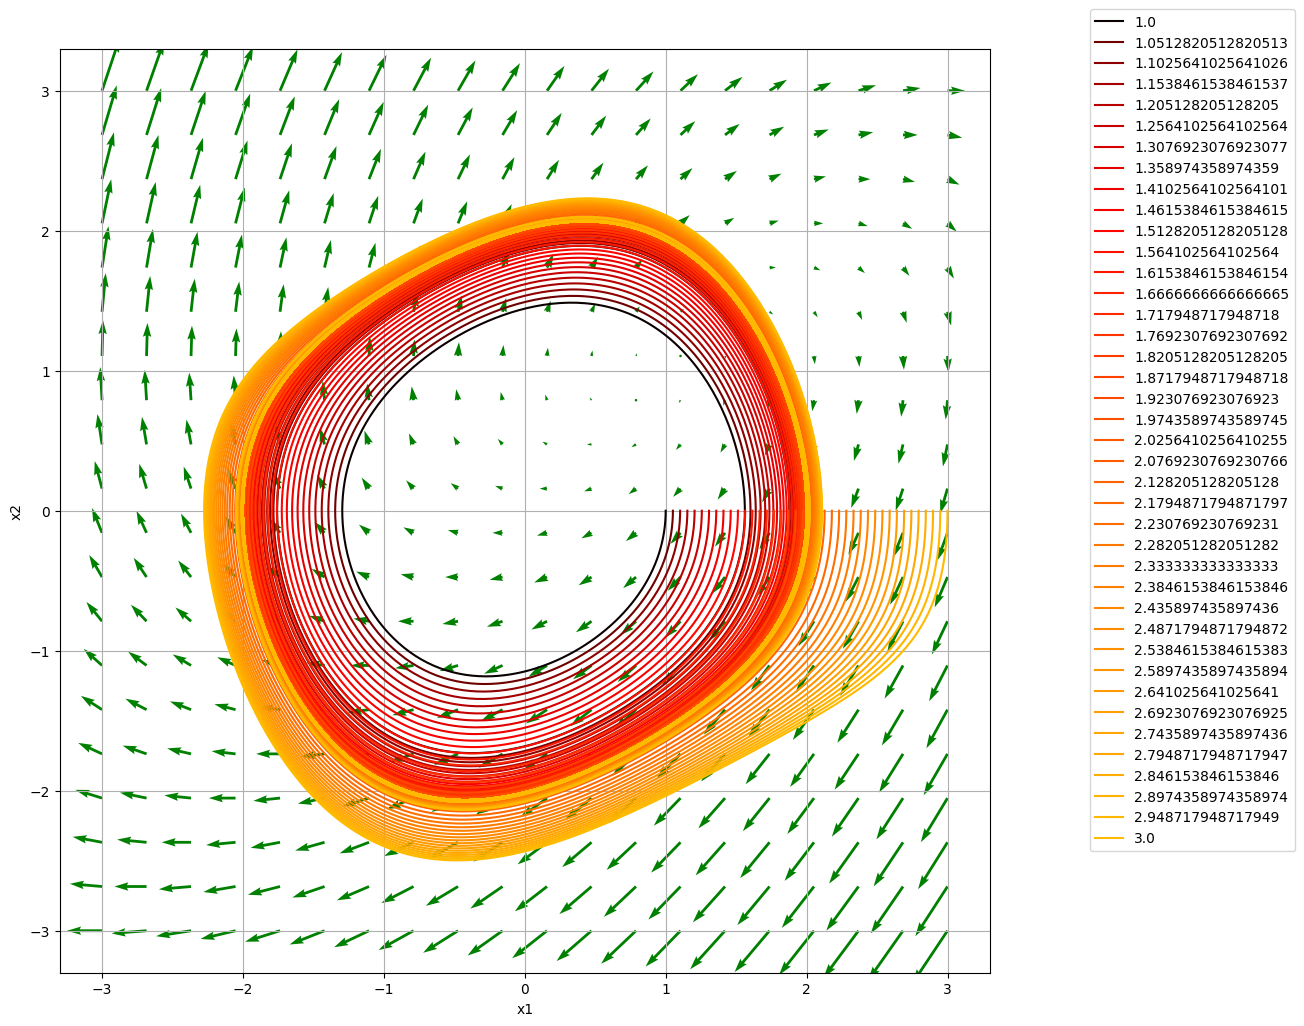

In [55]:

#define time range
timespan = (0., 500.)
init = 40 #number of initial conditions

#initial conditions
x0s = np.linspace(1, 3, init)
y0 = 0.0
i = 0
max_len = 0

colors = np.linspace(0, 1 / max(max(x0s), 1), init)
fig, axs = plt.subplots(1, 1, figsize =(12, 12))

for x0 in x0s:
    initial_conditions = [x0, y0]
    #Getting numerical Solution

    sol = solve_ivp(lambda t, y: xdot(y, t), t_span=timespan,
                    y0=initial_conditions, max_step = 0.01)
    #Picking coords of solution
    x, y = sol.y
    axs.plot(x, y, color = cm.hot(min(colors[i]**0.4, 0.7)), label = x0)
    
    i+=1
    
    
#resizing xpts array
xpts = xpts[:, :max_len]

bounds = 3
#Vector Field meshes
xvect, yvect = np.meshgrid(np.linspace(-bounds, bounds, 20),
                           np.linspace(-bounds, bounds, 20))

#Update vector fields
uvect = -1 + yvect
vvect = yvect - xvect

# Plotting Vector Field
axs.quiver(xvect, yvect, uvect, vvect, color='g')

axs.grid(True)

axs.set_xlabel("x1")
axs.set_ylabel("x2")
axs.legend(bbox_to_anchor=(1.1, 1.05))

# Show plot with grid
plt.show()

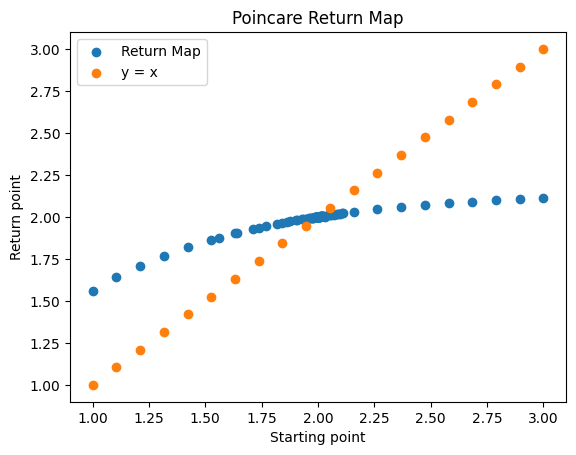

In [45]:
#Instead of having multiple lines, want one curve. 
#Combine all into one
ret_map = []
for curve in xpts:
    for i in range(len(curve[:7])):
        ret_map.append((curve[i], curve[i+1]))
ret_map = np.array(ret_map)
plt.scatter(ret_map[:, 0], ret_map[:, 1], label = "Return Map")
plt.xlabel("Starting point")
plt.ylabel("Return point")
plt.scatter(np.linspace(1, 3, 20), np.linspace(1, 3, 20), label = "y = x")
plt.title("Poincare Return Map")
plt.legend()

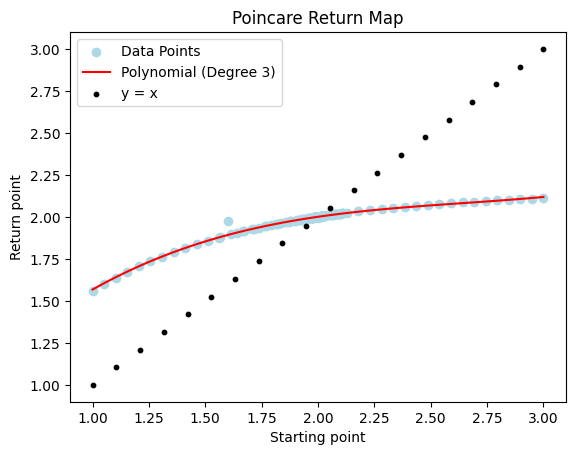

In [56]:
#Instead of having multiple lines, want one curve. 
#Combine all into one
ret_map = []
for curve in xpts:
    for i in range(len(curve[:7])):
        ret_map.append((curve[i], curve[i+1]))
ret_map = np.array(ret_map)

#sorting points 
sorted_indices = np.argsort(ret_map[:, 0])
sorted_data = ret_map[sorted_indices]

#Obtaining a Polynomial fot to the curve
coefficients = np.polyfit(sorted_data[:, 0], sorted_data[:, 1], 3)
poly_function = np.poly1d(coefficients)
x_curve = np.linspace(min(sorted_data[:, 0]), max(sorted_data[:, 0]), 100)
y_curve = poly_function(x_curve)

#Plotting
plt.scatter(sorted_data[:, 0], sorted_data[:, 1], label='Data Points', c='lightblue')
plt.plot(x_curve, y_curve, label=f'Polynomial (Degree {3})', color='red')
plt.xlabel('Starting point')
plt.ylabel('Return point')
plt.scatter(np.linspace(1, 3, 20), np.linspace(1, 3, 20), label = "y = x", color = 'k', s=10)
plt.title("Poincare Return Map")
plt.legend()

In [68]:
derivative = np.polyder(poly_function)
x_star = 2.0  
floquet = derivative(x_star)

print("Estimation of Floquet Multiplier: {:.3f}".format(floquet))


Estimation of Floquet Multiplier: 0.194


Estimation of the Period: 3.1632 += 0.0014


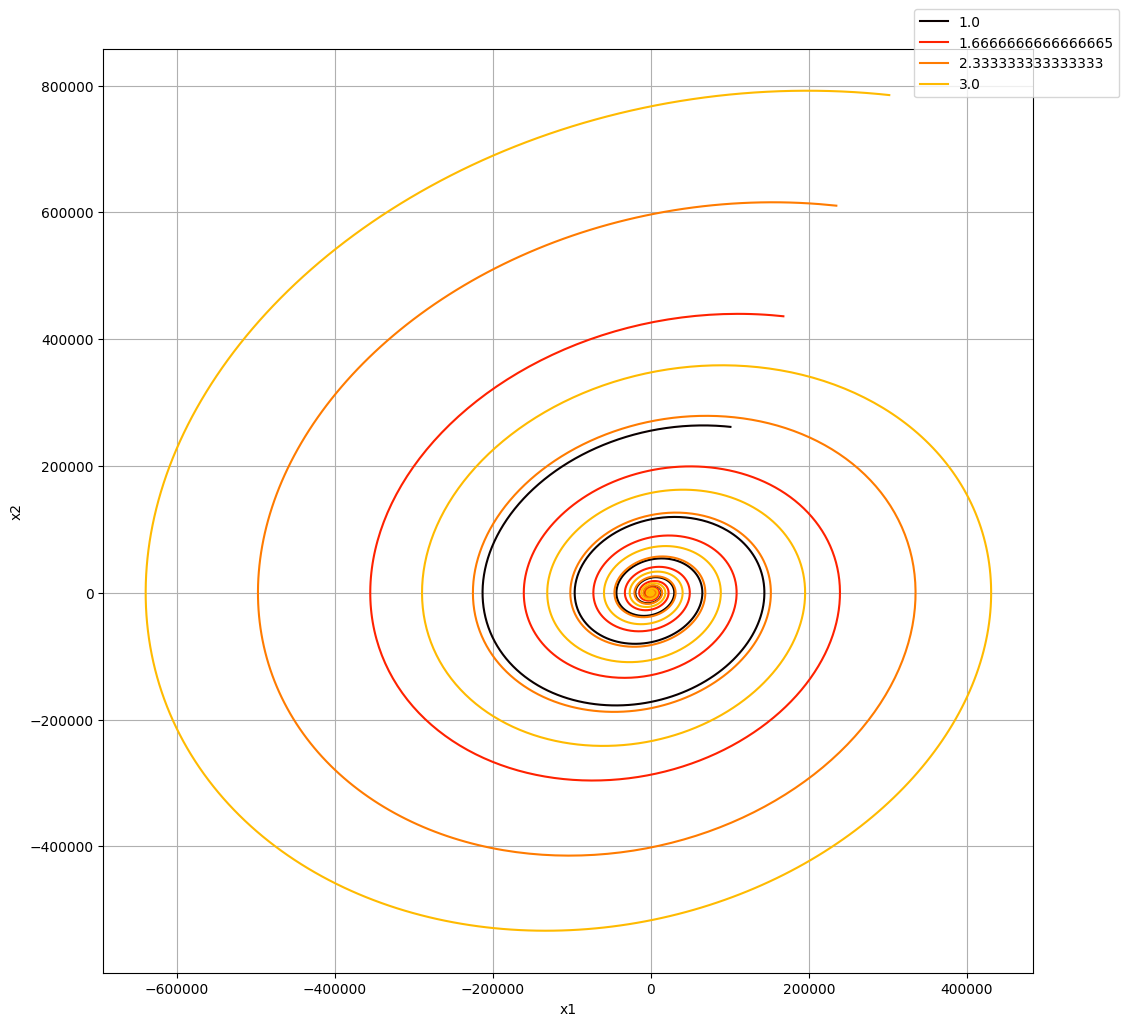

In [156]:
#define time range
timespan = (0., 50.)
init = 4 #number of initial conditions

#initial conditions
x0s = np.linspace(1, 3, init)
y0 = 0.0
i = 0
max_len = 0
Periods = np.zeros((init, 1)) #Minimal periods for initial conditions
colors = np.linspace(0, 1 / max(max(x0s), 1), init)
fig, axs = plt.subplots(1, 1, figsize =(12, 12))

for x0 in x0s:
    initial_conditions = [x0, y0]
#Getting numerical Solution

    sol = solve_ivp(lambda t, y: linxdot(y, t), t_span=timespan,
                    y0=initial_conditions, max_step = 0.01)
    #Picking coords of solution
    x, y = sol.y
    axs.plot(x, y, color = cm.hot(min(colors[i]**0.4, 0.7)), label = x0)
    period = get_period(sol)
    Periods[i] = period
    i+=1
    
    
#resizing xpts array
xpts = xpts[:, :max_len]

axs.grid(True)

axs.set_xlabel("x1")
axs.set_ylabel("x2")
axs.legend(bbox_to_anchor=(1.1, 1.05))

print("Estimation of the Period: {:.4f} += {:.4f}".format(Periods.mean(), Periods.std()))
# Show plot with grid
plt.show()

In [97]:
a = 1 + (3j)*np.sqrt(7)/4
b = 1 - (3j)*np.sqrt(7)/4
t = 3.1632 
matrix = np.array([
    [(1/6) * (1 - (3j) * np.sqrt(7)) * np.exp(a * t) / np.sqrt(7) - (1/6) * (1 + (3j) * np.sqrt(7)) * np.exp(b * t) / np.sqrt(7),
     (1/48) * (-1 - (3j) * np.sqrt(7)) * (1 - (3j) * np.sqrt(7)) * np.exp(a * t) / np.sqrt(7) + (1/48) * (1 - (3j) * np.sqrt(7)) * (1 + (3j) * np.sqrt(7)) * np.exp(b * t) / np.sqrt(7)],
    [(4j/3) * np.exp(a * t) / np.sqrt(7) - (4j/3) * np.exp(b * t) / np.sqrt(7),
     (1/6) * (-1 - (3j) * np.sqrt(7)) * np.exp(a * t) / np.sqrt(7) + (1/6) * (1 - (3j) * np.sqrt(7)) * np.exp(b * t) / np.sqrt(7)]
])

eigenvalues = np.linalg.eigvals(matrix)
print(eigenvalues)

[-0.10709801-23.75444212j  0.10709801-23.53687314j]


In [144]:
linMat = np.array([[0, 2],
                 [-2, 0.5]])

#t = 3.1632
t = sp.symbols('t')
eigvals, eigvects = np.linalg.eig(linMat)
Mono = sp.Matrix(eigvects)
Mono[0, 0] *= sp.exp(eigvals[0] * t)
Mono[0, 1] *= sp.exp(eigvals[0] * t)

Mono[1, 0] *= sp.exp(eigvals[1] * t)
Mono[1, 1] *= sp.exp(eigvals[1] * t)

zeroMat = Mono.subs(t, 0)
zeroMat = zeroMat.inv()

res = Mono * zeroMat
res.subs({t: 3.1632})
res.simplify()
res.eigenvals()
#print(np.linalg.eigvals(Mono))

{1.0*exp(t*(0.25 + 1.98431348329844*I)): 1,
 1.0*exp(t*(0.25 - 1.98431348329844*I)): 1}

In [155]:
t = sp.symbols('t')

linMat = sp.Matrix([[0, 2], 
                    [-2, 0.5]])

eigvals, eigvects = linMat.diagonalize()
Mono = eigvects * sp.diag(sp.exp(eigvals[0] * t), sp.exp(eigvals[1] * t)) * eigvects.inv()
zeroMat = Mono.subs(t, 0)
zeroMat_inv = zeroMat.inv()
res = Mono * zeroMat_inv
res_at_t = res.subs(t, 3.1632)
eigenvalues_res = res_at_t.eigenvals()


print(Mono.subs(t, 3.1632).eigenvals())

{0.104477621435603 + 0.0299966220466678*I: 1, -0.466072701884242 + 0.59323886946441*I: 1}
